In [330]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from IPython.display import Image  
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import recall_score,precision_score,accuracy_score
from sklearn.linear_model import LogisticRegression
import time

In [331]:
mycab = pd.read_csv('C:\DataScience-Learnbay\DataScience-Learnbay\Excel\Projects\MyCabs\YourCabs_training.csv')

In [332]:
mycab.head()

,id,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,to_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,Cost_of_error
0,132512,22177,28,NaN,2,83.0,448.0,NaN,NaN,1/1/2013 2:00,NaN,0,0,1/1/2013 1:39,12.924150,77.672290,12.927320,77.635750,0,1.0
1,132513,21413,12,NaN,2,1010.0,540.0,NaN,NaN,1/1/2013 9:00,NaN,0,0,1/1/2013 2:25,12.966910,77.749350,12.927680,77.626640,0,1.0
2,132514,22178,12,NaN,2,1301.0,1034.0,NaN,NaN,1/1/2013 3:30,NaN,0,0,1/1/2013 3:08,12.937222,77.626915,13.047926,77.597766,0,1.0
3,132515,13034,12,NaN,2,768.0,398.0,NaN,NaN,1/1/2013 5:45,NaN,0,0,1/1/2013 4:39,12.989990,77.553320,12.971430,77.639140,0,1.0
4,132517,22180,12,NaN,2,1365.0,849.0,NaN,NaN,1/1/2013 9:00,NaN,0,0,1/1/2013 7:53,12.845653,77.677925,12.954340,77.600720,0,1.0


In [333]:
mycab = mycab.drop(columns=['id','user_id','package_id','from_city_id','to_city_id','to_date','Cost_of_error'])

In [334]:
mycab.head()

,vehicle_model_id,travel_type_id,from_area_id,to_area_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation
0,28,2,83.0,448.0,1/1/2013 2:00,0,0,1/1/2013 1:39,12.924150,77.672290,12.927320,77.635750,0
1,12,2,1010.0,540.0,1/1/2013 9:00,0,0,1/1/2013 2:25,12.966910,77.749350,12.927680,77.626640,0
2,12,2,1301.0,1034.0,1/1/2013 3:30,0,0,1/1/2013 3:08,12.937222,77.626915,13.047926,77.597766,0
3,12,2,768.0,398.0,1/1/2013 5:45,0,0,1/1/2013 4:39,12.989990,77.553320,12.971430,77.639140,0
4,12,2,1365.0,849.0,1/1/2013 9:00,0,0,1/1/2013 7:53,12.845653,77.677925,12.954340,77.600720,0


In [335]:
(mycab.isnull().sum()*100)/len(mycab)

vehicle_model_id        0.000000
travel_type_id          0.000000
from_area_id            0.202620
to_area_id             21.040271
from_date               0.000000
online_booking          0.000000
mobile_site_booking     0.000000
booking_created         0.000000
from_lat                0.214133
from_long               0.214133
to_lat                 21.040271
to_long                21.040271
Car_Cancellation        0.000000
dtype: float64

In [336]:
mycab.from_area_id.describe()

count    43343.000000
mean       714.544494
std        419.883553
min          2.000000
25%        393.000000
50%        590.000000
75%       1089.000000
max       1403.000000
Name: from_area_id, dtype: float64

In [337]:
mycab.to_area_id.describe()

count    34293.000000
mean       669.490917
std        400.638225
min          2.000000
25%        393.000000
50%        541.000000
75%       1054.000000
max       1403.000000
Name: to_area_id, dtype: float64

## EDA on missing data from area_id and lat/long

In [338]:
mycab.loc[(mycab['from_area_id'].isnull()==False) & (mycab['to_area_id'].isnull()==True),:].shape

(9050, 13)

In [339]:
# mycab.loc[(mycab['from_area_id'].isnull()==False) & (mycab['to_area_id'].isnull()==True),:]

In [340]:
mycab.loc[(mycab['from_area_id'].isnull()==True) & (mycab['to_area_id'].isnull()==False),:].shape

(0, 13)

In [341]:
mycab.shape

(43431, 13)

In [342]:
mycab.loc[(mycab['from_area_id'].isnull()==True) & (mycab['to_area_id'].isnull()==True),:].shape

(88, 13)

In [343]:
mycab.loc[(mycab['from_area_id'].isnull()==True) & (mycab['to_area_id'].isnull()==True) & (mycab['to_lat'].isnull()==True),:].shape

(88, 13)

In [344]:
mycab.loc[(mycab['from_area_id'].isnull()==True) & (mycab['to_area_id'].isnull()==True) & (mycab['to_lat'].isnull()==False),:].shape

(0, 13)

In [345]:
mycab.loc[(mycab['from_area_id'].isnull()==True) & (mycab['to_area_id'].isnull()==True) & (mycab['from_lat'].isnull()==False),:].shape

(0, 13)

### Dropping recs from dataframe where both from_area_id and to_area_id are null

In [346]:
idx=mycab.loc[(mycab['from_area_id'].isnull()==True) & (mycab['to_area_id'].isnull()==True),:].index
mycab.drop(idx,inplace=True)

In [347]:
(mycab.isnull().sum()*100)/len(mycab)

vehicle_model_id        0.000000
travel_type_id          0.000000
from_area_id            0.000000
to_area_id             20.879958
from_date               0.000000
online_booking          0.000000
mobile_site_booking     0.000000
booking_created         0.000000
from_lat                0.011536
from_long               0.011536
to_lat                 20.879958
to_long                20.879958
Car_Cancellation        0.000000
dtype: float64

## Check where travel is not p2p and to_area_id is null

In [348]:
mycab['travel_type_id'].unique()

array([2, 1, 3], dtype=int64)

In [349]:
mycab.loc[(mycab['travel_type_id']!=2) & (mycab['to_area_id'].isnull()==True),:].shape

(9050, 13)

### Impute to_area_id to 9999 when travel_type_id is not p2p and to_area_id is null

In [350]:
# mycab['to_area_id'].fillna()

In [351]:
mycab['to_area_id'] = np.where((mycab['travel_type_id']!=2) & (mycab['to_area_id'].isnull()==True), 9999, mycab.to_area_id) 

In [352]:
mycab.loc[(mycab['travel_type_id']!=2) & (mycab['to_area_id'].isnull()==True),:].shape

(0, 13)

## Check where travel is p2p and to_area_id is null

In [353]:
mycab.loc[(mycab['travel_type_id']==2) & (mycab['to_area_id'].isnull()==True),:].shape

(0, 13)

In [354]:
mycab.isnull().sum()

vehicle_model_id          0
travel_type_id            0
from_area_id              0
to_area_id                0
from_date                 0
online_booking            0
mobile_site_booking       0
booking_created           0
from_lat                  5
from_long                 5
to_lat                 9050
to_long                9050
Car_Cancellation          0
dtype: int64

## Dropping latitude and longitude columns

In [355]:
mycab_final = mycab.drop(columns=['from_lat','from_long','to_lat','to_long'])
mycab_final.head()

,vehicle_model_id,travel_type_id,from_area_id,to_area_id,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation
0,28,2,83.0,448.0,1/1/2013 2:00,0,0,1/1/2013 1:39,0
1,12,2,1010.0,540.0,1/1/2013 9:00,0,0,1/1/2013 2:25,0
2,12,2,1301.0,1034.0,1/1/2013 3:30,0,0,1/1/2013 3:08,0
3,12,2,768.0,398.0,1/1/2013 5:45,0,0,1/1/2013 4:39,0
4,12,2,1365.0,849.0,1/1/2013 9:00,0,0,1/1/2013 7:53,0


## Manipulating Date and Time 

In [356]:
def timeofday(from_date):
    if(from_date.time() >= pd.to_datetime('05:00:00').time() and from_date.time() <= pd.to_datetime('12:00:00').time()):
        return 'Morning'
    elif(from_date.time() > pd.to_datetime('12:00:00').time() and from_date.time() <= pd.to_datetime('16:30:00').time()):
        return 'Noon'
    elif(from_date.time() > pd.to_datetime('16:30:00').time() and from_date.time() <= pd.to_datetime('19:30:00').time()):
        return 'Evening'
    elif(from_date.time() > pd.to_datetime('19:30:00').time() and from_date.time() <= pd.to_datetime('23:00:00').time()):
        return 'Night'
    else:
        return 'Mid_Night'

In [357]:
mycab_final['from_date'] = pd.to_datetime(mycab_final['from_date'])
mycab_final['booking_created'] = pd.to_datetime(mycab_final['booking_created'])

In [358]:
mycab_final['from_dt_time_of_day']=mycab_final['from_date'].apply(lambda x:timeofday(x))

In [359]:
mycab_final['booking_dt_time_of_day']=mycab_final['booking_created'].apply(lambda x:timeofday(x))

In [360]:
mycab_final.head(2)

,vehicle_model_id,travel_type_id,from_area_id,to_area_id,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,from_dt_time_of_day,booking_dt_time_of_day
0,28,2,83.0,448.0,2013-01-01 02:00:00,0,0,2013-01-01 01:39:00,0,Mid_Night,Mid_Night
1,12,2,1010.0,540.0,2013-01-01 09:00:00,0,0,2013-01-01 02:25:00,0,Morning,Mid_Night


In [361]:
mycab_final['booking_created_day_of_week']=mycab_final['booking_created'].apply(lambda x:x.day_name())
mycab_final['from_date_day_of_week']=mycab_final['from_date'].apply(lambda x:x.day_name())

In [362]:
mycab_final.head()

,vehicle_model_id,travel_type_id,from_area_id,to_area_id,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,from_dt_time_of_day,booking_dt_time_of_day,booking_created_day_of_week,from_date_day_of_week
0,28,2,83.0,448.0,2013-01-01 02:00:00,0,0,2013-01-01 01:39:00,0,Mid_Night,Mid_Night,Tuesday,Tuesday
1,12,2,1010.0,540.0,2013-01-01 09:00:00,0,0,2013-01-01 02:25:00,0,Morning,Mid_Night,Tuesday,Tuesday
2,12,2,1301.0,1034.0,2013-01-01 03:30:00,0,0,2013-01-01 03:08:00,0,Mid_Night,Mid_Night,Tuesday,Tuesday
3,12,2,768.0,398.0,2013-01-01 05:45:00,0,0,2013-01-01 04:39:00,0,Morning,Mid_Night,Tuesday,Tuesday
4,12,2,1365.0,849.0,2013-01-01 09:00:00,0,0,2013-01-01 07:53:00,0,Morning,Morning,Tuesday,Tuesday


In [363]:
def typeofday(from_date):
        if(from_date.weekday()>=5):
            return 'Weekend'
        else:
            return 'Weekday'
        
        
def dayofmonth(from_date):
        return from_date.day
        
def monthnumber(from_date):
    return from_date.month
    
def yearnumber(from_date):
    return from_date.year

In [364]:
mycab_final['type_of_day_booking_dt']=mycab_final['booking_created'].apply(lambda x:typeofday(x))
mycab_final['type_of_day_from_dt']=mycab_final['from_date'].apply(lambda x:typeofday(x))

mycab_final['day_of_month_booking_dt']=mycab_final['booking_created'].apply(lambda x:dayofmonth(x))
mycab_final['day_of_month_from_dt']=mycab_final['from_date'].apply(lambda x:dayofmonth(x))

mycab_final['month_number_booking_dt']=mycab_final['booking_created'].apply(lambda x:monthnumber(x))
mycab_final['month_number_from_dt']=mycab_final['from_date'].apply(lambda x:monthnumber(x))


In [365]:
mycab_final['booking_created'][0].day

1

In [366]:
mycab_final['booking_created'][0].month

1

In [367]:
mycab_final['booking_created'][0].year

2013

In [368]:
# mycab_final['year_number_from_dt'].value_counts()

In [369]:
# mycab_final['year_number_booking_dt'].value_counts()

In [370]:
mycab_final['month_number_booking_dt'].value_counts()

8     5618
7     4911
10    4910
9     4769
6     4408
5     4306
4     3145
1     2937
2     2871
3     2817
11    2651
Name: month_number_booking_dt, dtype: int64

In [371]:
mycab_final['month_number_from_dt'].value_counts()

8     5436
7     4893
10    4800
9     4727
6     4380
5     4290
11    3166
4     3109
2     2887
1     2851
3     2785
12      19
Name: month_number_from_dt, dtype: int64

In [372]:
mycab_final['day_of_month_booking_dt'].value_counts(normalize=True)

1     0.037261
30    0.036430
6     0.035969
12    0.034861
14    0.034400
10    0.033962
9     0.033939
11    0.033685
20    0.033500
13    0.033154
2     0.032923
19    0.032577
22    0.032577
15    0.032324
7     0.032254
3     0.031793
8     0.031724
4     0.031724
18    0.031539
27    0.031331
17    0.031331
21    0.031262
5     0.031147
31    0.031101
23    0.031101
25    0.030916
28    0.030570
16    0.030524
24    0.028378
26    0.028148
29    0.027594
Name: day_of_month_booking_dt, dtype: float64

In [373]:
mycab_final['day_of_month_from_dt'].value_counts(normalize=True)

12    0.035807
10    0.035323
11    0.035069
1     0.035046
14    0.034723
9     0.034331
20    0.034215
13    0.034192
19    0.033454
21    0.033039
15    0.032993
7     0.032923
23    0.032877
3     0.032831
2     0.032716
6     0.032623
17    0.032531
8     0.032439
26    0.032324
24    0.032139
22    0.032001
16    0.031862
4     0.031285
5     0.031055
18    0.031032
25    0.030524
28    0.030293
30    0.029878
27    0.029209
29    0.027663
31    0.023602
Name: day_of_month_from_dt, dtype: float64

In [374]:
mycab_final.head()

,vehicle_model_id,travel_type_id,from_area_id,to_area_id,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,from_dt_time_of_day,booking_dt_time_of_day,booking_created_day_of_week,from_date_day_of_week,type_of_day_booking_dt,type_of_day_from_dt,day_of_month_booking_dt,day_of_month_from_dt,month_number_booking_dt,month_number_from_dt
0,28,2,83.0,448.0,2013-01-01 02:00:00,0,0,2013-01-01 01:39:00,0,Mid_Night,Mid_Night,Tuesday,Tuesday,Weekday,Weekday,1,1,1,1
1,12,2,1010.0,540.0,2013-01-01 09:00:00,0,0,2013-01-01 02:25:00,0,Morning,Mid_Night,Tuesday,Tuesday,Weekday,Weekday,1,1,1,1
2,12,2,1301.0,1034.0,2013-01-01 03:30:00,0,0,2013-01-01 03:08:00,0,Mid_Night,Mid_Night,Tuesday,Tuesday,Weekday,Weekday,1,1,1,1
3,12,2,768.0,398.0,2013-01-01 05:45:00,0,0,2013-01-01 04:39:00,0,Morning,Mid_Night,Tuesday,Tuesday,Weekday,Weekday,1,1,1,1
4,12,2,1365.0,849.0,2013-01-01 09:00:00,0,0,2013-01-01 07:53:00,0,Morning,Morning,Tuesday,Tuesday,Weekday,Weekday,1,1,1,1


In [375]:
mycab_final['from_date']=pd.to_datetime(mycab_final['from_date'])
mycab_final['booking_created']=pd.to_datetime(mycab_final['booking_created'])

In [376]:
mycab_final['travel_type_id'].value_counts(normalize=True)

2    0.791177
3    0.174192
1    0.034631
Name: travel_type_id, dtype: float64

In [377]:
mycab_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43343 entries, 0 to 43430
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   vehicle_model_id             43343 non-null  int64         
 1   travel_type_id               43343 non-null  int64         
 2   from_area_id                 43343 non-null  float64       
 3   to_area_id                   43343 non-null  float64       
 4   from_date                    43343 non-null  datetime64[ns]
 5   online_booking               43343 non-null  int64         
 6   mobile_site_booking          43343 non-null  int64         
 7   booking_created              43343 non-null  datetime64[ns]
 8   Car_Cancellation             43343 non-null  int64         
 9   from_dt_time_of_day          43343 non-null  object        
 10  booking_dt_time_of_day       43343 non-null  object        
 11  booking_created_day_of_week  43343 non-nu

In [378]:
mycab_final['difference_bookingdt_startdt']=mycab_final.from_date-mycab_final.booking_created
mycab_final['difference_bookingdt_startdt_mins']=mycab_final['difference_bookingdt_startdt']/np.timedelta64(1,'m')
mycab_final.drop(columns=['difference_bookingdt_startdt'],inplace=True)

In [379]:
mycab_final.head()

,vehicle_model_id,travel_type_id,from_area_id,to_area_id,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,from_dt_time_of_day,booking_dt_time_of_day,booking_created_day_of_week,from_date_day_of_week,type_of_day_booking_dt,type_of_day_from_dt,day_of_month_booking_dt,day_of_month_from_dt,month_number_booking_dt,month_number_from_dt,difference_bookingdt_startdt_mins
0,28,2,83.0,448.0,2013-01-01 02:00:00,0,0,2013-01-01 01:39:00,0,Mid_Night,Mid_Night,Tuesday,Tuesday,Weekday,Weekday,1,1,1,1,21.0
1,12,2,1010.0,540.0,2013-01-01 09:00:00,0,0,2013-01-01 02:25:00,0,Morning,Mid_Night,Tuesday,Tuesday,Weekday,Weekday,1,1,1,1,395.0
2,12,2,1301.0,1034.0,2013-01-01 03:30:00,0,0,2013-01-01 03:08:00,0,Mid_Night,Mid_Night,Tuesday,Tuesday,Weekday,Weekday,1,1,1,1,22.0
3,12,2,768.0,398.0,2013-01-01 05:45:00,0,0,2013-01-01 04:39:00,0,Morning,Mid_Night,Tuesday,Tuesday,Weekday,Weekday,1,1,1,1,66.0
4,12,2,1365.0,849.0,2013-01-01 09:00:00,0,0,2013-01-01 07:53:00,0,Morning,Morning,Tuesday,Tuesday,Weekday,Weekday,1,1,1,1,67.0


In [380]:
mycab_final.columns

Index(['vehicle_model_id', 'travel_type_id', 'from_area_id', 'to_area_id',
       'from_date', 'online_booking', 'mobile_site_booking', 'booking_created',
       'Car_Cancellation', 'from_dt_time_of_day', 'booking_dt_time_of_day',
       'booking_created_day_of_week', 'from_date_day_of_week',
       'type_of_day_booking_dt', 'type_of_day_from_dt',
       'day_of_month_booking_dt', 'day_of_month_from_dt',
       'month_number_booking_dt', 'month_number_from_dt',
       'difference_bookingdt_startdt_mins'],
      dtype='object')

In [381]:
mycab_final_new=mycab_final[['vehicle_model_id', 'travel_type_id', 'from_area_id', 'to_area_id','online_booking', 'mobile_site_booking','from_dt_time_of_day', 'booking_dt_time_of_day','booking_created_day_of_week', 'from_date_day_of_week','type_of_day_booking_dt', 'type_of_day_from_dt','difference_bookingdt_startdt_mins','day_of_month_booking_dt','day_of_month_from_dt','month_number_booking_dt','month_number_from_dt','Car_Cancellation']]

In [382]:
mycab_final_new.head(2)

,vehicle_model_id,travel_type_id,from_area_id,to_area_id,online_booking,mobile_site_booking,from_dt_time_of_day,booking_dt_time_of_day,booking_created_day_of_week,from_date_day_of_week,type_of_day_booking_dt,type_of_day_from_dt,difference_bookingdt_startdt_mins,day_of_month_booking_dt,day_of_month_from_dt,month_number_booking_dt,month_number_from_dt,Car_Cancellation
0,28,2,83.0,448.0,0,0,Mid_Night,Mid_Night,Tuesday,Tuesday,Weekday,Weekday,21.0,1,1,1,1,0
1,12,2,1010.0,540.0,0,0,Morning,Mid_Night,Tuesday,Tuesday,Weekday,Weekday,395.0,1,1,1,1,0


In [383]:
mycab_final_new = pd.get_dummies(mycab_final_new,columns=['from_dt_time_of_day','booking_dt_time_of_day','booking_created_day_of_week','from_date_day_of_week','type_of_day_booking_dt','type_of_day_from_dt'],drop_first=True)

In [384]:
mycab_final_new.head()

,vehicle_model_id,travel_type_id,from_area_id,to_area_id,online_booking,mobile_site_booking,difference_bookingdt_startdt_mins,day_of_month_booking_dt,day_of_month_from_dt,month_number_booking_dt,...,booking_created_day_of_week_Tuesday,booking_created_day_of_week_Wednesday,from_date_day_of_week_Monday,from_date_day_of_week_Saturday,from_date_day_of_week_Sunday,from_date_day_of_week_Thursday,from_date_day_of_week_Tuesday,from_date_day_of_week_Wednesday,type_of_day_booking_dt_Weekend,type_of_day_from_dt_Weekend
0,28,2,83.0,448.0,0,0,21.0,1,1,1,...,1,0,0,0,0,0,1,0,0,0
1,12,2,1010.0,540.0,0,0,395.0,1,1,1,...,1,0,0,0,0,0,1,0,0,0
2,12,2,1301.0,1034.0,0,0,22.0,1,1,1,...,1,0,0,0,0,0,1,0,0,0
3,12,2,768.0,398.0,0,0,66.0,1,1,1,...,1,0,0,0,0,0,1,0,0,0
4,12,2,1365.0,849.0,0,0,67.0,1,1,1,...,1,0,0,0,0,0,1,0,0,0


In [385]:
mycab_final_new.isnull().sum()

vehicle_model_id                         0
travel_type_id                           0
from_area_id                             0
to_area_id                               0
online_booking                           0
mobile_site_booking                      0
difference_bookingdt_startdt_mins        0
day_of_month_booking_dt                  0
day_of_month_from_dt                     0
month_number_booking_dt                  0
month_number_from_dt                     0
Car_Cancellation                         0
from_dt_time_of_day_Mid_Night            0
from_dt_time_of_day_Morning              0
from_dt_time_of_day_Night                0
from_dt_time_of_day_Noon                 0
booking_dt_time_of_day_Mid_Night         0
booking_dt_time_of_day_Morning           0
booking_dt_time_of_day_Night             0
booking_dt_time_of_day_Noon              0
booking_created_day_of_week_Monday       0
booking_created_day_of_week_Saturday     0
booking_created_day_of_week_Sunday       0
booking_cre

In [386]:
mycab_final_new_x = mycab_final_new.drop(columns=['Car_Cancellation'])
mycab_final_new_y = mycab_final_new['Car_Cancellation']

In [387]:

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(mycab_final_new_x,mycab_final_new_y,test_size =0.2,stratify=mycab_final_new_y,random_state=42)

## Random Forest

In [388]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import GridSearchCV

In [389]:
fit_rf = RandomForestClassifier()

In [390]:
fit_rf.fit(x_train,y_train)

RandomForestClassifier()

In [391]:
#accuracy
y_pred_test = fit_rf.predict(x_test)
y_pred_train = fit_rf.predict(x_train)
#accuracy
print(accuracy_score(y_test,y_pred_test))
print(accuracy_score(y_train,y_pred_train))

0.9401315030568693
0.9999423198938686


In [392]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97      8043
           1       0.75      0.26      0.38       626

    accuracy                           0.94      8669
   macro avg       0.85      0.62      0.67      8669
weighted avg       0.93      0.94      0.93      8669



In [393]:
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     32170
           1       1.00      1.00      1.00      2504

    accuracy                           1.00     34674
   macro avg       1.00      1.00      1.00     34674
weighted avg       1.00      1.00      1.00     34674



## Oversampling

In [394]:
# Random oversampling
from imblearn.over_sampling import RandomOverSampler , SMOTE
from collections import Counter
os = RandomOverSampler(random_state=42)
mycab_final_new_x_os , mycab_final_new_y_os = os.fit_resample(mycab_final_new_x.to_numpy(),mycab_final_new_y.to_numpy())
print(format(Counter(mycab_final_new_y)))
print(format(Counter(mycab_final_new_y_os)))

Counter({0: 40213, 1: 3130})
Counter({0: 40213, 1: 40213})


In [314]:
x_train, x_test, y_train, y_test = train_test_split(mycab_final_new_x_os,mycab_final_new_y_os,test_size =0.2,stratify=mycab_final_new_y_os,random_state=42)

In [315]:
fit_rf.fit(x_train,y_train)

RandomForestClassifier()

In [316]:
#accuracy
y_pred_test = fit_rf.predict(x_test)
y_pred_train = fit_rf.predict(x_train)
#accuracy
print(accuracy_score(y_test,y_pred_test))
print(accuracy_score(y_train,y_pred_train))

0.9900534626383191
0.9999533727074914


In [317]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      8043
           1       0.98      1.00      0.99      8043

    accuracy                           0.99     16086
   macro avg       0.99      0.99      0.99     16086
weighted avg       0.99      0.99      0.99     16086



In [318]:
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     32170
           1       1.00      1.00      1.00     32170

    accuracy                           1.00     64340
   macro avg       1.00      1.00      1.00     64340
weighted avg       1.00      1.00      1.00     64340



## SMOTE

In [319]:
# Random oversampling
from imblearn.over_sampling import SMOTE
from collections import Counter
os = SMOTE(random_state=42,sampling_strategy=0.80)
mycab_final_new_x_os , mycab_final_new_y_os = os.fit_resample(mycab_final_new_x.to_numpy(),mycab_final_new_y.to_numpy())
print(format(Counter(mycab_final_new_y)))
print(format(Counter(mycab_final_new_y_os)))

Counter({0: 40213, 1: 3130})
Counter({0: 40213, 1: 32170})


In [320]:
x_train, x_test, y_train, y_test = train_test_split(mycab_final_new_x_os,mycab_final_new_y_os,test_size =0.2,stratify=mycab_final_new_y_os,random_state=42)

In [321]:
fit_rf.fit(x_train,y_train)

RandomForestClassifier()

In [322]:
#accuracy
y_pred_test = fit_rf.predict(x_test)
y_pred_train = fit_rf.predict(x_train)
#accuracy
print(accuracy_score(y_test,y_pred_test))
print(accuracy_score(y_train,y_pred_train))

0.964219106168405
0.9999827306324043


In [323]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      8043
           1       0.99      0.93      0.96      6434

    accuracy                           0.96     14477
   macro avg       0.97      0.96      0.96     14477
weighted avg       0.97      0.96      0.96     14477



In [324]:
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     32170
           1       1.00      1.00      1.00     25736

    accuracy                           1.00     57906
   macro avg       1.00      1.00      1.00     57906
weighted avg       1.00      1.00      1.00     57906



In [325]:
fit_rf.feature_importances_

array([0.01027516, 0.00412482, 0.0318122 , 0.03295794, 0.17029923,
       0.01675125, 0.07967752, 0.03013971, 0.02568457, 0.07455421,
       0.06775515, 0.03092348, 0.04363134, 0.02960986, 0.02439133,
       0.00804238, 0.04238931, 0.01960822, 0.02832349, 0.00886634,
       0.01707571, 0.02061417, 0.01810406, 0.01219124, 0.01218601,
       0.01163043, 0.01314461, 0.01284207, 0.00868316, 0.00968243,
       0.01094076, 0.03650307, 0.0365848 ])

In [326]:
imp_features=dict(zip(mycab_final_new_x.columns, fit_rf.feature_importances_))
imp_features = sorted(imp_features.items(), key=lambda x:x[1],reverse=False)
imp_features=dict(imp_features)
print(imp_features)


{'travel_type_id': 0.004124817985401591, 'booking_dt_time_of_day_Mid_Night': 0.008042382421178383, 'from_date_day_of_week_Thursday': 0.00868315547489903, 'booking_created_day_of_week_Monday': 0.008866343137723817, 'from_date_day_of_week_Tuesday': 0.009682426933541604, 'vehicle_model_id': 0.010275161023473263, 'from_date_day_of_week_Wednesday': 0.010940759455868206, 'from_date_day_of_week_Monday': 0.01163042620894867, 'booking_created_day_of_week_Wednesday': 0.01218600845488452, 'booking_created_day_of_week_Tuesday': 0.01219123890603152, 'from_date_day_of_week_Sunday': 0.01284206628308148, 'from_date_day_of_week_Saturday': 0.013144606758073695, 'mobile_site_booking': 0.01675124651728556, 'booking_created_day_of_week_Saturday': 0.017075706863623717, 'booking_created_day_of_week_Thursday': 0.018104058366822995, 'booking_dt_time_of_day_Night': 0.019608216717355922, 'booking_created_day_of_week_Sunday': 0.0206141657798113, 'from_dt_time_of_day_Noon': 0.024391331424009663, 'day_of_month_from

In [327]:
list(imp_features.values())

[0.004124817985401591,
 0.008042382421178383,
 0.00868315547489903,
 0.008866343137723817,
 0.009682426933541604,
 0.010275161023473263,
 0.010940759455868206,
 0.01163042620894867,
 0.01218600845488452,
 0.01219123890603152,
 0.01284206628308148,
 0.013144606758073695,
 0.01675124651728556,
 0.017075706863623717,
 0.018104058366822995,
 0.019608216717355922,
 0.0206141657798113,
 0.024391331424009663,
 0.02568456926924355,
 0.028323494691178626,
 0.029609856481054776,
 0.03013971247355142,
 0.030923477168736283,
 0.031812197049957344,
 0.03295794026858734,
 0.03650307119005547,
 0.036584799230476875,
 0.04238931381396196,
 0.04363133675300366,
 0.06775515288815594,
 0.07455420764601532,
 0.07967751979220827,
 0.17029923257179824]

<BarContainer object of 10 artists>

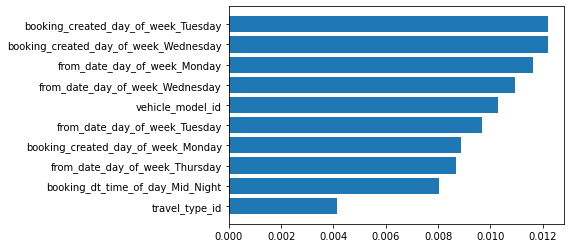

In [328]:

plt.barh(list(imp_features.keys())[0:10], list(imp_features.values())[0:10])